<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/Estadistica/Montecarlo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIZ ILEANA RODRIGUEZ 

18-Febrero-2023

In [ ]:
# importando modulos necesarios

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import gmean, hmean, trim_mean, uniform, norm
from scipy.stats import shapiro

![alt text](https://steemitimages.com/p/2bP4pJr4wVimqCWjYimXJe2cnCgn5DUA6MvX91E58ut?format=match&mode=fit&width=640)

Los métodos de Monte Carlo (MC) son un subconjunto de algoritmos computacionales que utilizan el proceso de muestreo aleatorio repetido para realizar estimaciones numéricas de parámetros desconocidos. 

---

Permiten **modelar** situaciones complejas en las que intervienen muchas variables aleatorias y evaluar el impacto del riesgo. 

Los usos de MC son increíblemente amplios y han llevado a una serie de descubrimientos revolucionarios en los campos de la física, la teoría de juegos y las finanzas, entre otros muchos.... 

Existe un amplio espectro de métodos de Monte Carlo, pero todos comparten el rasgo común de que se basan en la generación de números aleatorios para resolver problemas deterministas. 

![img](https://i.imgur.com/EGbQfMo.gif)


## ¿Qué es un modelo?

* Varias definiciones posibles...
  * Simplificación de realidades abstractas, permitirnos un mejor entendimiento y descripción de éstos.
  * Una abstracción donde sólo los "ingredientes esenciales" se mantienen, de acuerdo a ciertas preguntas acerca del sistema
  * Representación de un fenómeno matemático o basado en un lenguaje computacional

# Ejemplo práctico

Para este ejemplo, intentaremos predecir cuánto dinero deberíamos tener de presupuesto para dar comisiones de ventas para el próximo año. 

Este problema es útil para modelar porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos alguna experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva **empresarial**. Las comisiones de venta pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto. 

---

Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que puede realizarse para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

![img](https://pbpython.com/images/Excel_Table_1.png)

En este ejemplo, la comisión es el resultado de esta fórmula:

$$Commission Amount = Actual Sales * Commission Rate$$

La tasa de comisión se basa en esta tabla de Porcentaje para planificar:

![img](https://pbpython.com/images/Excel_Table_4.png)

Antes de construir un modelo y ejecutar la simulación, veamos un enfoque simple para predecir el gasto de comisión del próximo año.

### Enfoque ingenuo del problema

Imagine que su tarea como analista es decirle a los de finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos obtienen el 100% de su objetivo y ganan la tasa de comisión del 4%. Conectar estos valores en Excel produce esto:

![img](https://pbpython.com/images/Excel_Table_2.png)

Imagínemos que presenta esto al de finanzas y ellos dicen: 

*Nunca todos obtienen la misma tasa de comisión. Necesitamos un modelo más preciso*.

Para la segunda ronda, puede probar un par de rangos:

![img](https://pbpython.com/images/Excel_Table_6.png)

Ahora, **tenemos** un poco más de información y volvemos con el experto... Esta vez dicen: "*este rango es útil, pero ¿cuál es su confianza en este rango? Además, necesitamos que haga esto para una fuerza de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar*". Hmmm ... Ahora, ¿qué haces?


----


Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repite este proceso muchas veces para determinar un rango de posibles valores de comisión para el año. Hacer esto manualmente ... es un desafío. Afortunadamente, Python simplifica mucho este enfoque.


## Monte Carlo Estacionario</center></h1>

---

Ahora que hemos cubierto el problema a un alto nivel, podemos discutir cómo el 
análisis de Monte Carlo podría ser una herramienta útil para predecir los gastos
de comisiones para el próximo año. 

En su nivel más simple, un análisis (o simulación) de Monte Carlo implica ejecuta ejecutar muchos escenarios con diferentes entradas aleatorias y resumir la distribución de los resultados.

Usando el análisis de comisiones, podemos continuar el proceso manual que comenzamos anteriormente, pero ejecutamos el programa cientos o incluso miles de veces y obtendremos una distribución de los montos de comisiones potenciales. 

Esta distribución puede informar la probabilidad de que el gasto esté dentro de una ventana determinada. **Al final del día, esta es una predicción, por lo que probablemente nunca la predeciremos con exactitud.** Podemos desarrollar una idea más informada sobre el riesgo potencial de un presupuesto excesivo o insuficiente.

------------

Hay dos componentes para ejecutar una simulación de Monte Carlo:

  * la ecuación para evaluar
  * las variables aleatorias para la entrada 

Ya hemos descrito la ecuación anterior. Ahora debemos pensar en cómo poblar las variables aleatorias.

Un enfoque simple sería tomar un número aleatorio entre 0% y 200% (que representa nuestra intuición sobre las tasas de comisiones). 

Sin embargo, debido a que pagamos comisiones todos los años, entendemos nuestro problema con un poco más de detalle y podemos usar ese conocimiento previo para construir un modelo más preciso.

Debido a que hemos pagado comisiones durante varios años, podemos observar una distribución histórica típica del porcentaje al objetivo:

![img](https://pbpython.com/images/monte_carlo_image_hist_pct.png)

Para este modelo, usaremos una generación de números aleatorios de numpy. El aspecto útil de numpy es que hay varios generadores de números aleatorios que pueden crear muestras aleatorias basadas en una distribución predefinida.

Como se describió anteriormente, sabemos que nuestro porcentaje histórico de rendimiento objetivo se centra en una media del 100% y una desviación estándar del 10%. Definamos esas variables, así como la cantidad de representantes de ventas y simulaciones que estamos modelando:

In [ ]:
avg = 1
std_dev = .1
num_reps = 500           # numero de vendedores
num_simulations = 1000   # numero de simulaciones

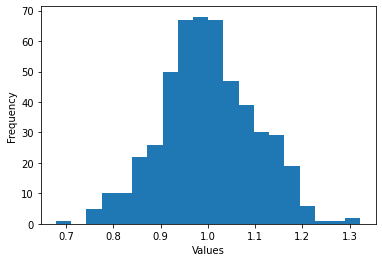

In [ ]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(pct_to_target, 20)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Dado que estamos tratando de hacer una mejora en nuestro enfoque simple, vamos a seguir con una distribución normal para el porcentaje objetivo. Sin embargo, al usar numpy, podemos ajustar y usar otra distribución para modelos futuros si es necesario....

Hay otro valor que debemos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, asumiremos que nuestra distribución objetivo de ventas se parece a esto:

![img](https://pbpython.com/images/monte_carlo_sales_target.png)

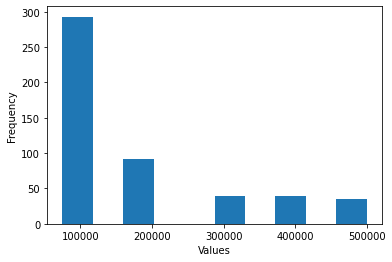

In [ ]:
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)   #choice toma en cuenta la aprte de repeticiones para obtener valores y asignarle una probabilidad

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(sales_target, 10)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

In [ ]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df

,Pct_To_Target,Sales_Target,Sales
0,1.1070,75000,83025.0
1,1.0376,100000,103760.0
2,1.1334,100000,113340.0
3,1.1103,300000,333090.0
4,1.1463,75000,85972.5
...,...,...,...
495,0.9138,100000,91380.0
496,1.1896,75000,89220.0
497,0.9730,400000,389200.0
498,0.9365,75000,70237.5


Puede notar que hice un pequeño truco para calcular el monto real de las ventas. Para este problema, la cantidad real de ventas puede cambiar mucho a lo largo de los años, pero la distribución del rendimiento sigue siendo notablemente constante. Por lo tanto, estoy usando las distribuciones aleatorias para generar mis entradas y respaldar las ventas reales.

La última pieza de código que necesitamos crear es una forma de asignar nuestro Pct_To_Target a la tasa de comisión. Aquí está la función:


In [ ]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [ ]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.1070,75000,83025.0,0.04,3321.0
1,1.0376,100000,103760.0,0.04,4150.4
2,1.1334,100000,113340.0,0.04,4533.6
3,1.1103,300000,333090.0,0.04,13323.6
4,1.1463,75000,85972.5,0.04,3438.9


¡Ahí está!

Hemos replicado un modelo que es similar a lo que hubiéramos hecho en Excel, pero usamos algunas distribuciones más sofisticadas que simplemente arrojar un montón de entradas de números aleatorios al problema.

Si sumamos los valores (solo los 5 primeros se muestran arriba) en la columna Commission_Amount, podemos ver que esta simulación muestra que pagaríamos de...

In [ ]:
df['Commission_Amount'].sum().round(2)

3043369.82

### Hagamos más repeticiones...

La verdadera *magia* de la simulación de Monte Carlo es que si ejecutamos una simulación muchas veces, comenzamos a desarrollar una imagen de la distribución probable de los resultados.

Además de ejecutar cada simulación, guardamos los resultados que nos interesan en una lista que convertiremos en un **dataframe** para un análisis más detallado de la distribución de resultados.

Aquí el código...

In [ ]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [ ]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [ ]:
#descriptivas para n escenarios (segun los definidos)

results_df.describe().round(2)

,Sales,Commission_Amount,Sales_Target
count,1000.00,1000.00,1000.00
mean,83967016.75,2867505.30,83959250.00
std,2719527.47,100854.26,2711879.42
min,76873750.00,2583748.00,76875000.00
25%,82147375.00,2797359.25,82200000.00
50%,83829875.00,2868103.00,83825000.00
75%,85747062.50,2933596.00,85750000.00
max,91274500.00,3148645.00,91700000.00


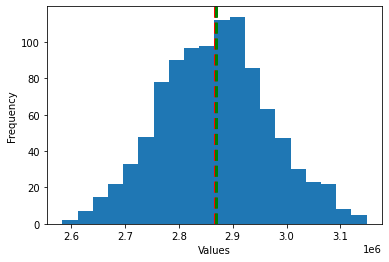

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Aquí radica uno de los beneficios de la simulación de Monte Carlo. 

Desarrolla una mejor comprensión de la distribución de resultados probables y puede utilizar ese conocimiento para hacer una estimación informada.

El otro valor de este modelo es que puede modelar muchas suposiciones diferentes y ver qué sucede.

# Reto !

A continuación, se muestran algunos cambios simples que puede realizar para ver cómo cambian los resultados:

  *  Aumente el rango de la tasa de comisión desde el 1 al 5%
  *  Incrementar el número de vendedores.
  *  Cambiar la desviación estándar esperada a una de cantidad mayor (>0.3)
  *  Modificar la distribución de objetivos

In [ ]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .85:
        return .01
    elif x <= .90:
        return .02
    elif x <= .95:
        return .03
    elif x <= .99:
        return .04
    else:
        return .05

In [ ]:
avg = 1
std_dev = .4
num_reps = 1000
num_simulations = 1000

pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.2, .3, .2, .15, .1, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [ ]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [ ]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])
    
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [ ]:
results_df.describe().round(2)

,Sales,Commission_Amount,Sales_Target
count,1000.0,1000.00,1.000000e+03
mean,194943712.5,7614959.92,1.950714e+08
std,5124761.6,272300.94,4.086409e+06
min,178184500.0,6691992.00,1.820250e+08
25%,191703312.5,7432297.00,1.924438e+08
50%,195005875.0,7620056.50,1.950875e+08
75%,198334000.0,7796299.00,1.977500e+08
max,213368500.0,8576760.00,2.088250e+08


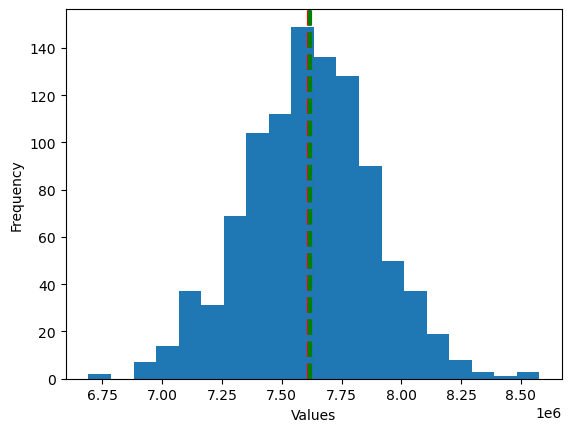

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

### Nota importante

* Una simulación de Monte Carlo es una herramienta útil para predecir resultados futuros al calcular una fórmula varias veces con diferentes entradas aleatorias. 

* Usar numpy y pandas para construir un modelo y generar múltiples resultados potenciales y analizarlos es relativamente sencillo. El otro beneficio adicional es que los analistas pueden ejecutar muchos escenarios cambiando las entradas y pueden pasar a modelos mucho más sofisticados en el futuro si surgen las necesidades. Finalmente, los resultados se pueden compartir con usuarios no técnicos y facilitar las discusiones en torno a la incertidumbre de los resultados finales.

In [ ]:
df_h12 = pd.read_csv("https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/h_12.tsv", sep="\t")
df_h12

,Element,Unit,Sample,S,RSD,U
0,Ca,mg/L,3598.922273,NaN,40,NaN
1,Mg,mg/L,1056.487091,NaN,40,NaN
2,Na,mg/L,1680.129729,NaN,40,NaN
3,K,mg/L,249.094420,NaN,40,NaN
4,SO4,mg/L,2896.603374,NaN,40,NaN
5,Cl,mg/L,3509.984386,NaN,40,NaN
6,HCO3,mg/L,1473.160525,NaN,40,NaN
7,CO3,mg/L,4876.165141,NaN,40,NaN


In [ ]:
df_h12['S_Calc'] = (df_h12['Sample']*df_h12['RSD'])/100
df_h12

,Element,Unit,Sample,S,RSD,U,S_Calc
0,Ca,mg/L,3598.922273,NaN,40,NaN,1439.568909
1,Mg,mg/L,1056.487091,NaN,40,NaN,422.594836
2,Na,mg/L,1680.129729,NaN,40,NaN,672.051892
3,K,mg/L,249.094420,NaN,40,NaN,99.637768
4,SO4,mg/L,2896.603374,NaN,40,NaN,1158.641350
5,Cl,mg/L,3509.984386,NaN,40,NaN,1403.993754
6,HCO3,mg/L,1473.160525,NaN,40,NaN,589.264210
7,CO3,mg/L,4876.165141,NaN,40,NaN,1950.466056


In [ ]:
def PosNormal(df, mean_Head, std_Head, repetitions):
    test = pd.DataFrame()
    
    #Conversiones
    for k in range(8):
        val = np.array([1])
        for i in range(11):
            np.random.seed(i+(11*k))
            mu = df[mean_Head][k]
            sigma = df[std_Head][k]
            s = abs(np.random.randn(repetitions) * sigma + mu)
            val = np.concatenate((val,s), axis=0)
        #print(val[0])
        val = val[1:]
        test["Element"+str(k)] = val
        print("Element " + str(k))
        print(val.size)
        print(min(val))
        print(max(val))
        print(val.mean())
        print(val.std())
        print(val.std()/val.mean()*100)
        count, bins, ignored = plt.hist(val, 50, density=True)
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')

        plt.show()
    return test

In [ ]:
test = PosNormal(df_h12, 'Sample', 'S_Calc', 200)

In [ ]:
test.describe()

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,3643.093480,1048.748024,1694.003742,250.709925,2893.565172,3474.028568,1487.658113,4886.726384
std,1427.352060,415.239239,672.573206,100.687277,1149.980203,1404.028030,577.506191,1950.123611
min,19.030163,5.069252,4.187096,0.701362,41.342941,17.713815,1.449677,24.195032
25%,2685.652998,759.189190,1255.681451,180.891674,2142.948341,2502.150918,1106.921287,3509.341845
50%,3634.217471,1052.769457,1689.634231,249.885286,2870.690463,3452.127973,1471.874448,4846.899603
75%,4602.370673,1318.628026,2118.682370,318.545706,3644.703657,4430.746827,1873.269257,6244.704142
max,9513.668432,2470.133333,4366.054092,591.594161,6736.428105,10231.415313,3424.231580,12744.940454


In [ ]:
test

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
0,6138.397184,1795.797631,1618.334611,217.324569,2026.910125,1230.276042,2307.331405,5313.937207
1,4174.976149,935.594120,696.682155,89.377015,4421.789401,3367.080381,833.640092,6166.459824
2,5007.883045,851.712368,2407.149873,96.128738,4340.432739,969.048987,1109.992257,3745.367544
3,6824.842451,64.791631,1519.290797,192.260948,1037.081634,3878.748737,1027.136912,5671.587285
4,6287.400692,1052.986049,1350.065464,227.500096,1195.551400,3874.956322,1677.663331,5786.017312
...,...,...,...,...,...,...,...,...
2195,5405.831353,1239.625089,1156.095647,246.565458,5181.261367,3245.182971,2025.411222,4501.444347
2196,4962.375528,1159.589688,1846.874564,269.549376,511.691189,4321.232986,1337.873068,3957.555457
2197,2127.235585,1230.341894,1887.092442,127.173688,2457.530916,2067.114337,1611.932908,6921.658014
2198,5279.141568,1429.544071,2425.293884,295.668090,1708.994043,2876.092783,1606.121397,8221.245797


---
---
---
<h1><center>Referencias y links de interés</center></h1>

---

* [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros)
* Información extra de [Métodos Monte Carlo](https://www.statisticshowto.com/monte-carlo-simulation/)
* Información sobre algoritmo [Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)
* M. Matsumoto and T. Nishimura (1998) - [Mersenne twister: a 623-dimensionally equidistributed uniform pseudo-random number generator](https://dl.acm.org/doi/10.1145/272991.272995)

* [Cadenas de Markov](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50)
* [Más de MCMC](http://people.duke.edu/~ccc14/sta-663/MCMC.html)

**Tutoriales MCMC**
* [Tutorial MCMC - Inferencia Bayesiana](https://nbviewer.org/github/yoyolin/mcmc-tutorial/blob/master/MCMC_for_Bayesian_Inference.ipynb)

* [Otro ejemplo MCMC](https://github.com/prappleizer/prappleizer.github.io/blob/master/Tutorials/MCMC/MCMC_Tutorial_Solution.ipynb)

* [Artículo - Data Analysis Recipes: Using MCMC](https://iopscience.iop.org/article/10.3847/1538-4365/aab76e/pdf)
--------

* La [falacia del jugador: qué es y cómo nos afecta](https://psicologiaymente.com/psicologia/falacia-del-jugador)
* [Funciones en python](https://docs.python.org/3/tutorial/classes.html)

* [Función lambda](https://www.w3schools.com/python/python_lambda.asp)
* [likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)
* [cdf](https://dlsun.github.io/symbulate/joint.html)